In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 73% 9.00M/12.3M [00:00<00:00, 70.5MB/s]
100% 12.3M/12.3M [00:00<00:00, 86.1MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random

In [ ]:
shutil.copy("/content/nasa-cmaps.zip","/content/drive/MyDrive/")
! cp /content/drive/MyDrive/nasa-cmaps.zip /content/
! unzip nasa-cmaps.zip


Archive:  nasa-cmaps.zip
replace CMaps/Damage Propagation Modeling.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
data_train = pd.read_csv("/content/CMaps/train_FD003.txt",sep=" ",header=None)
data_test = pd.read_csv("/content/CMaps/test_FD003.txt",sep=" ",header=None)
data_RUL = pd.read_csv("/content/CMaps/RUL_FD003.txt",sep=" ",header=None)

train_copy = data_train
test_copy = data_test

In [ ]:
data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [ ]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_train.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.002194,0.000294,0.0,0.00,0.523031,6.810418,9.773178,3.552786e-15,...,3.255314,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,-0.008600,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,-0.000000,-0.000000,100.0,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,0.001500,0.000300,100.0,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,0.008600,0.000700,100.0,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [ ]:
# Define a function to calculate the remaining useful life (RUL)
def add_rul(g):
    # Calculate the RUL as the difference between the maximum cycle value and the cycle value for each row
    g['RUL'] = max(g['cycles']) - g['cycles']
    return g

# Apply the add_rul function to the training data grouped by the unit ID
train = data_train.groupby('unit_ID').apply(add_rul)

In [ ]:
train.head()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254


Text(0.5, 1.0, 'Number of Cycles for Engines')

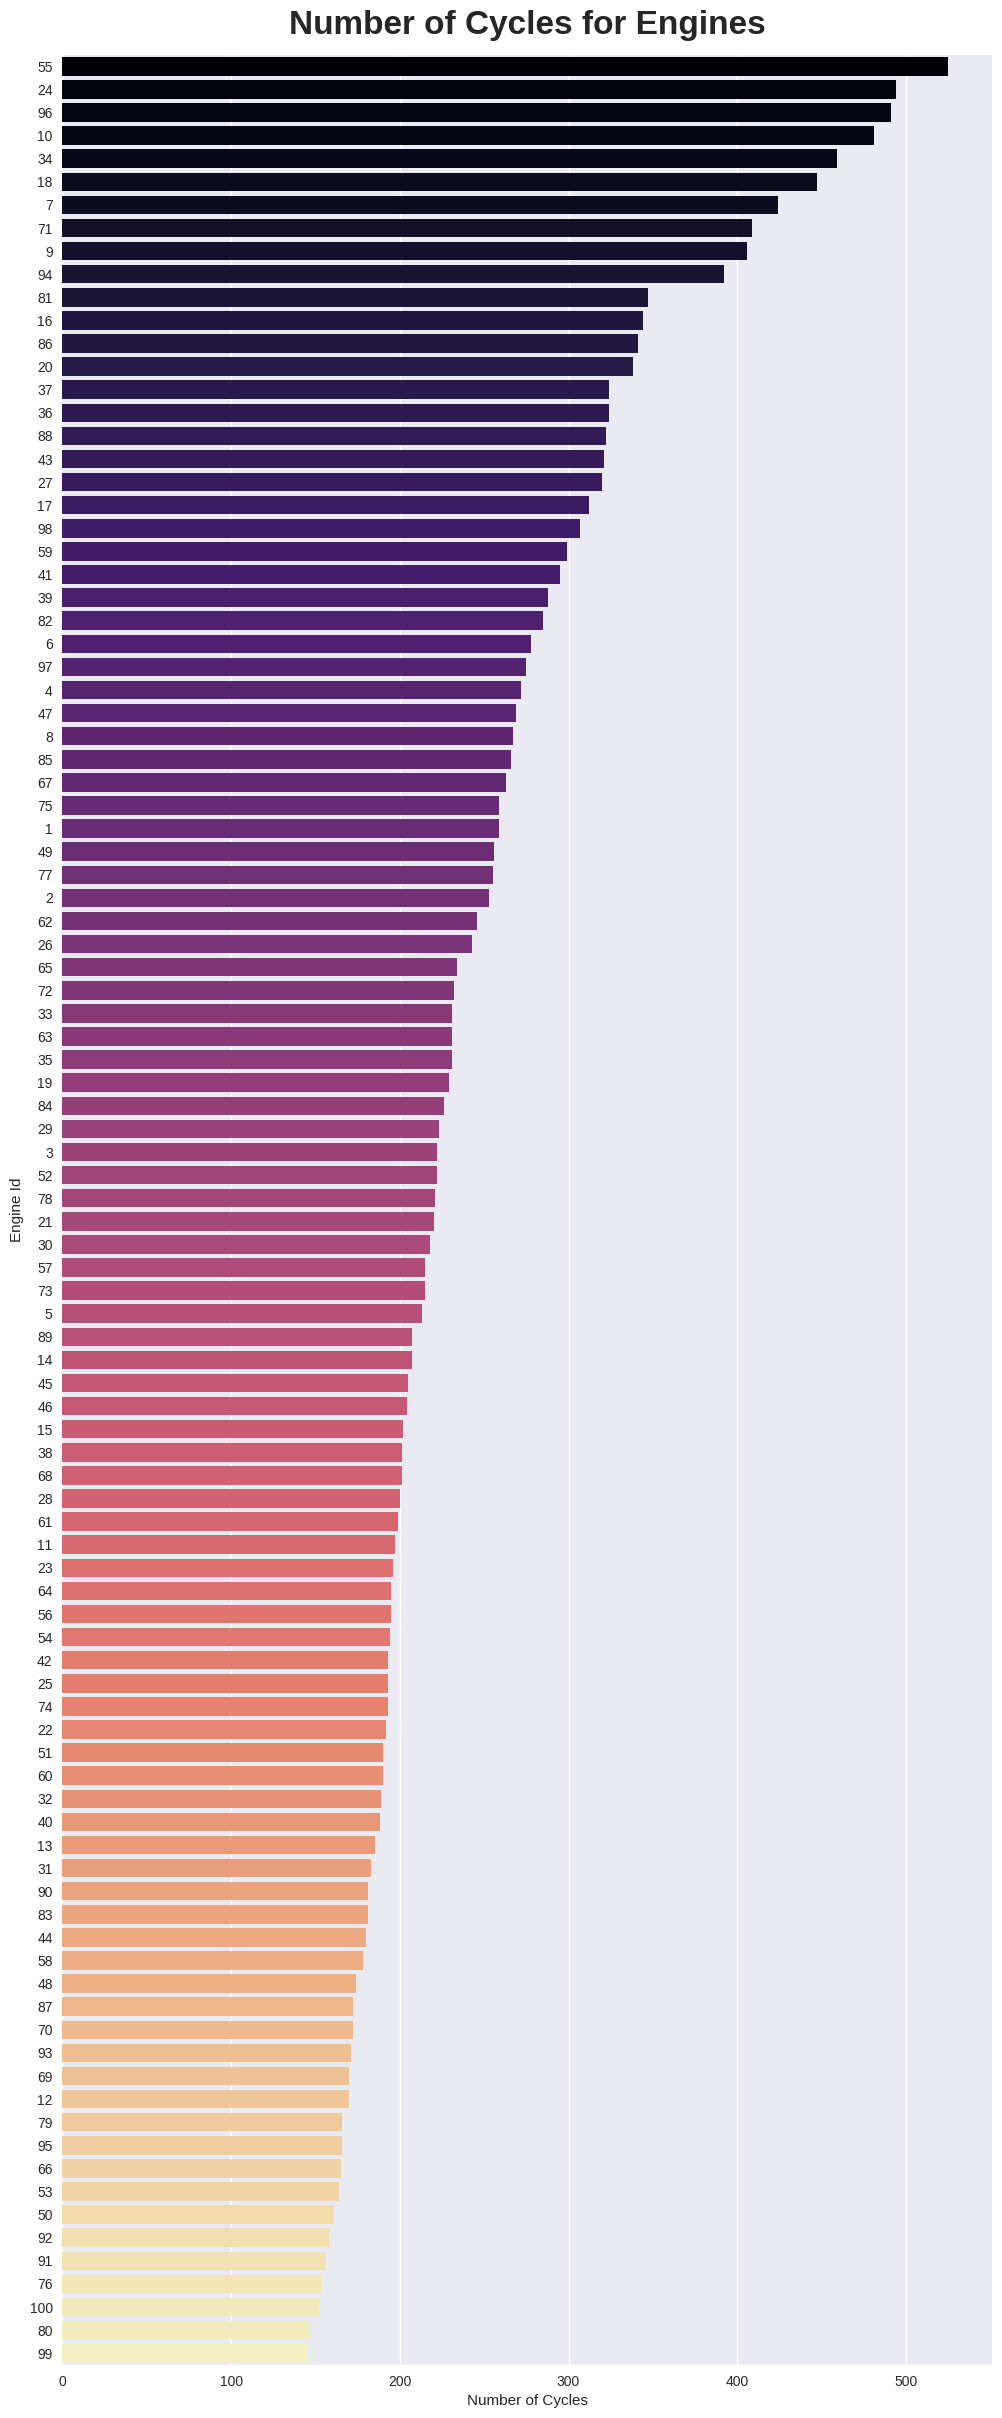

In [ ]:
cnt_train = train[["unit_ID", "cycles"]].groupby("unit_ID").max().sort_values(by="cycles", ascending=False)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycles.values)

plt.style.use("seaborn")
plt.figure(figsize=(12, 30))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='magma')
plt.xlabel('Number of Cycles')
plt.ylabel('Engine Id')
plt.title('Number of Cycles for Engines', fontweight='bold', fontsize=24, pad=15)

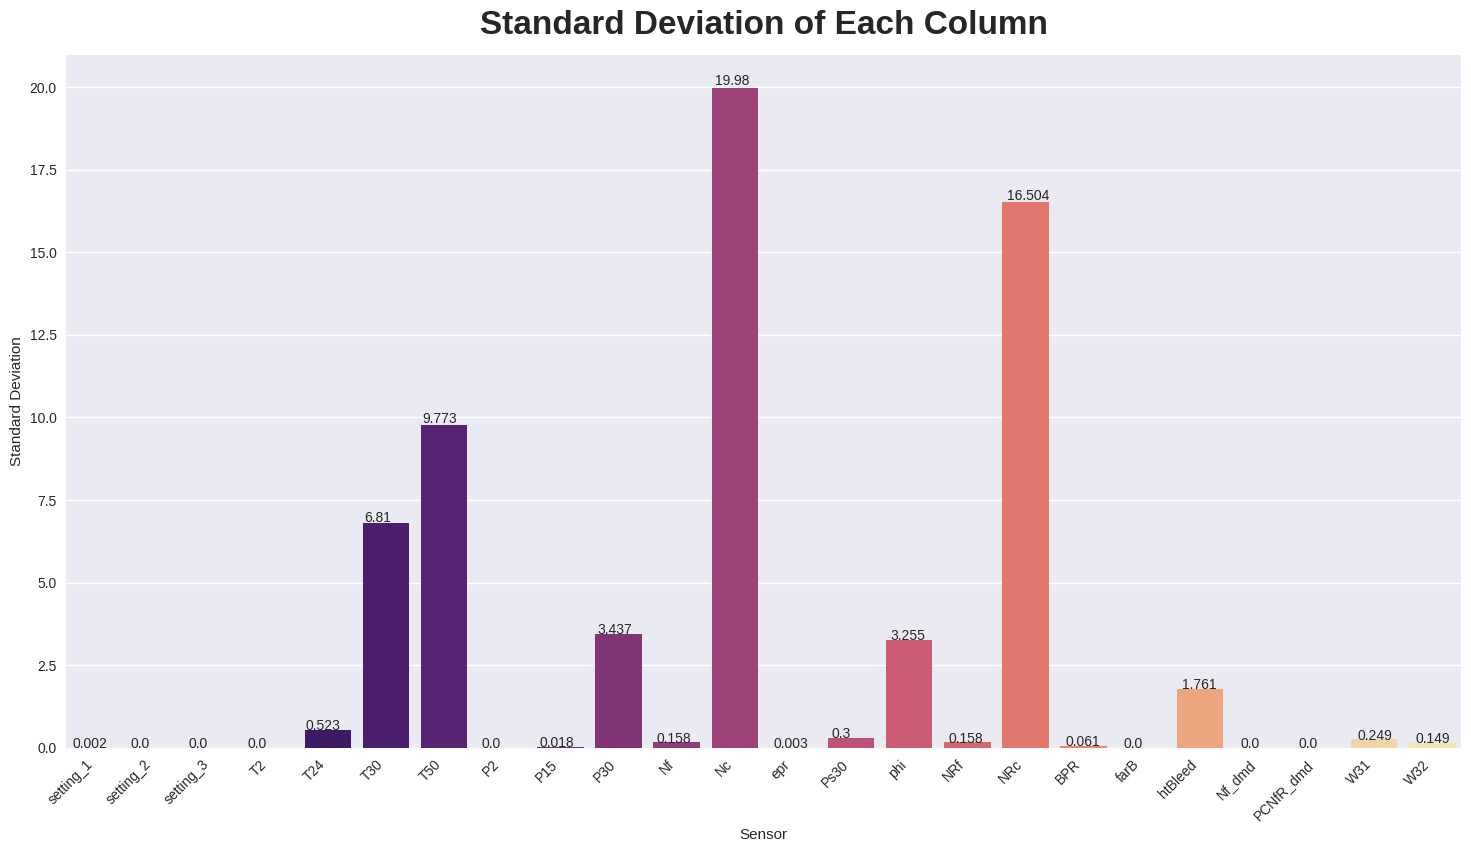

In [ ]:
plt.figure(figsize=(18, 9))
subset_stats = data_train.agg(['mean', 'std']).T[2:]
ax = sns.barplot(x=subset_stats.index, y="std", data=subset_stats, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','setting_3','farB','epr'],inplace=True)
#columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr', 'farB', 'BPR', 'PCNfR_dmd']

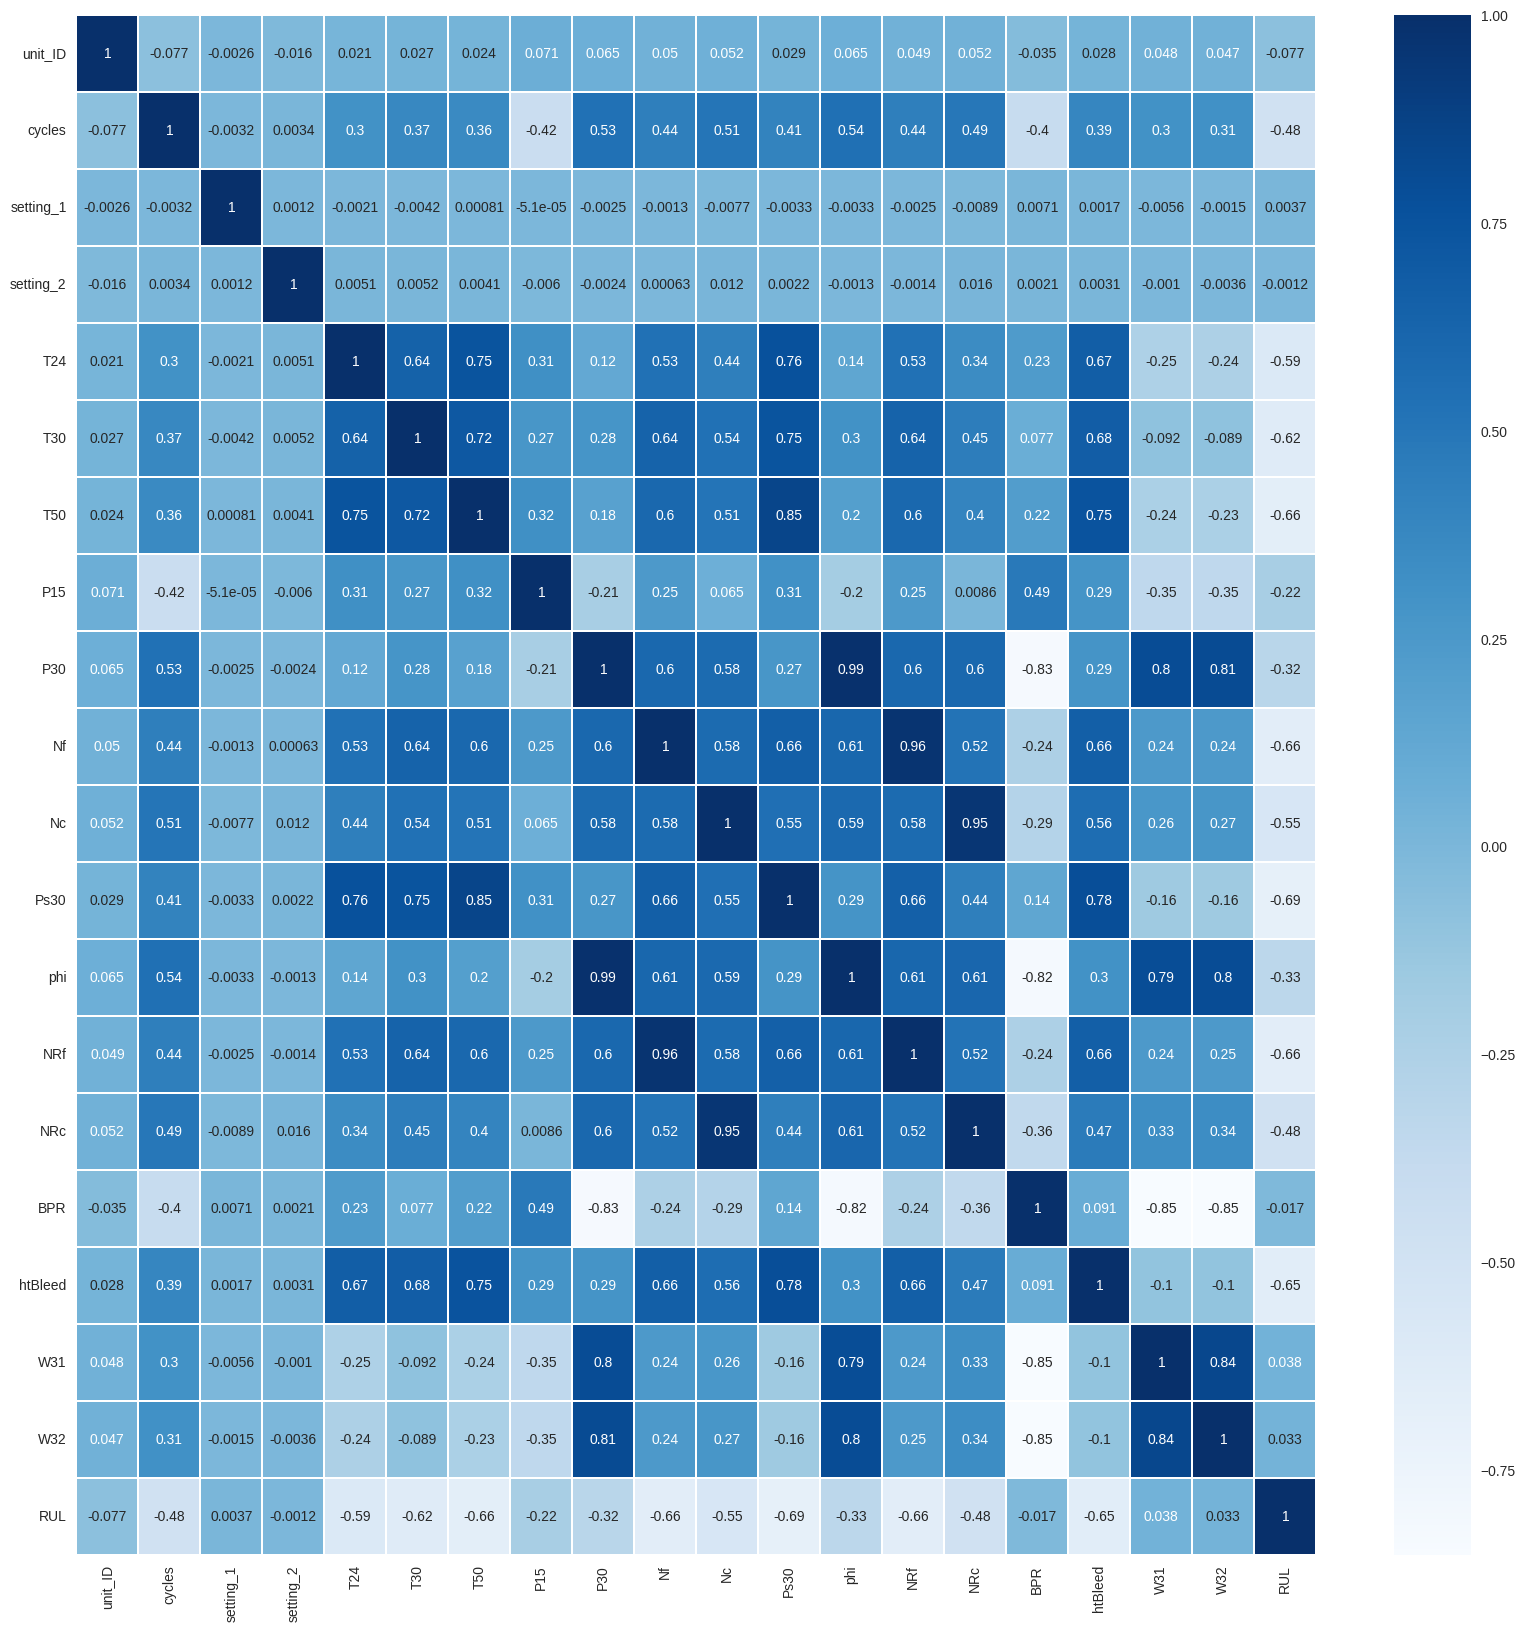

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
def process_targets(data_length, early_rul = None):
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))

In [ ]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    num_batches = np.int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

In [ ]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):

    max_num_test_batches = np.int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [ ]:
test_data = pd.read_csv("/content/CMaps/test_FD003.txt", sep = "\s+", header = None,names=columns_train )
true_rul = pd.read_csv("/content/CMaps/RUL_FD003.txt", sep = '\s+', header = None)

window_length = 30
shift = 1
early_rul = 125
processed_train_data = []
processed_train_targets = []
num_test_windows = 5
processed_test_data = []
num_test_windows_list = []

columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr',
                 'farB', 'Nf_dmd', 'PCNfR_dmd']

train_data_first_column = data_train ["unit_ID"]
test_data_first_column = test_data["unit_ID"]

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(data_train.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.396909,-0.187102,-0.712038,-0.780848,-0.341494,-0.704785,-0.097138,-0.385602,-0.227593,-0.389857,0.067687,0.469741,-0.889364,0.488019,-0.263512
1,1.0,-1.386793,0.080574,-0.497656,-0.775732,-0.172755,-0.452071,-0.116658,-0.618882,-0.193802,-0.263369,0.523946,0.729201,-0.321641,0.005819,0.375767
2,1.0,-1.376676,-0.531256,-0.841254,0.116524,-0.207667,-0.262536,0.306267,-0.652208,-0.313608,-0.453101,0.361559,-0.100409,-0.889364,-0.556747,-0.175058
3,1.0,-1.366559,0.883602,-0.362566,-1.248464,0.019257,-0.452071,0.022983,-0.585556,-0.172298,0.052852,0.142821,-0.138419,-0.321641,-0.114730,-0.656192
4,1.0,-1.356442,-1.487242,0.080881,-0.697966,-0.117479,-0.199357,0.602065,-0.885488,-0.144650,-0.263369,0.217955,-0.153292,-0.321641,0.608569,0.437416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100.0,0.090272,2.527897,1.164537,2.009498,-0.955353,1.127391,0.335797,2.846998,-1.041663,1.444222,-0.371001,1.775302,0.813805,-2.204262,-2.880934
24716,100.0,0.100389,1.591031,1.218867,2.524183,-0.955353,1.001034,0.024484,2.380437,-0.964864,1.317734,0.009518,2.003362,1.381528,-1.963162,-2.803872
24717,100.0,0.110506,2.642615,2.415587,2.756456,-1.118272,1.127391,-0.033074,2.547066,-1.109246,1.064758,-0.500062,2.084340,1.949251,-2.405178,-2.176656
24718,100.0,0.120623,2.833812,1.392134,2.261213,-1.295739,1.190569,-0.094636,2.113831,-0.934145,1.191246,-0.179530,1.960394,1.381528,-2.726644,-2.129079


In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.396909,-0.990129,-0.902925,-0.771639,-0.169846,-0.894321,-0.773819,-1.085443,-0.356616,-0.832566,-0.649725,-0.333427,-0.889364,0.327286,0.360354
1,1.0,-1.386793,-0.837172,-0.472693,-0.570063,-0.303673,-0.831142,-0.879925,-1.118768,-0.368904,-0.389857,-0.409780,0.165661,-0.889364,0.206736,0.587519
2,1.0,-1.376676,-1.487242,-0.924951,-1.284277,-0.213485,-0.641607,-0.460003,-0.885488,-0.292104,-0.832566,-0.360700,-0.675517,-0.889364,0.447836,0.210251
3,1.0,-1.366559,-0.493017,-0.521150,-0.934332,-0.164028,-0.831142,-0.453997,-0.518905,-0.184586,-0.706078,-0.432199,-0.417710,-0.321641,-0.074547,0.570767
4,1.0,-1.356442,0.004095,0.139616,-0.881124,-0.286218,-0.388893,-0.776822,-1.585329,-0.350472,-0.642833,-0.606098,0.304480,-0.889364,0.407652,0.013241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100.0,1.051376,1.113038,1.014764,0.696695,1.764827,1.064212,1.211177,0.647497,1.898205,1.064758,1.092906,-1.690219,1.381528,1.653334,0.682674
16592,100.0,1.061493,0.023215,0.468531,1.347469,1.709550,1.380105,1.063028,1.114058,1.910493,1.191246,1.153498,-1.181215,0.813805,1.733701,1.394323
16593,100.0,1.071610,0.462968,0.841496,0.841994,1.750280,1.001034,1.009975,0.614172,1.975004,1.317734,1.085635,-1.153121,0.813805,1.773884,1.039839
16594,100.0,1.081727,-0.512137,1.108739,0.215777,2.186673,1.064212,1.421889,0.914103,1.947356,1.633955,1.211667,-1.741449,1.381528,1.653334,1.847313


In [ ]:
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract training data with the specified window length.
    print(len(temp_train_data))
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,
                                                                                window_length= window_length, shift = shift)

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

259
253
222
272
213
278
424
267
406
481
197
170
185
207
202
344
312
447
229
338
220
192
196
494
193
243
320
200
223
218
183
189
231
459
231
324
324
201
288
188
295
193
321
180
205
204
269
174
256
161
190
222
164
194
525
195
215
178
299
190
199
246
231
195
234
165
263
201
170
172
409
232
215
193
259
153
255
221
166
147
347
285
181
226
266
341
172
322
207
181
156
158
171
392
166
491
275
307
145
152


In [ ]:
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract test data with the specified window length.
    print(len(temp_test_data))
    if (len(temp_test_data) <= window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift = shift,
                                                             num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

233
124
234
68
138
64
158
192
238
131
103
146
65
169
112
126
230
244
115
207
263
119
405
475
169
130
104
70
89
333
152
120
180
105
144
90
47
133
310
313
101
87
133
146
88
180
56
179
211
147
118
38
108
50
203
162
158
119
149
112
78
224
137
271
79
122
186
188
105
84
367
232
109
68
191
180
381
279
170
85
155
194
168
76
118
174
218
41
120
206
56
266
158
333
213
358
95
182
289
247


In [ ]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (21820, 30, 15)
Processed training ruls shape:  (21820,)
Processed test data shape:  (500, 30, 15)
True RUL shape:  (100,)


In [ ]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (17456, 30, 15)
Processed validation data shape:  (4364, 30, 15)
Processed train targets shape:  (17456,)
Processed validation targets shape:  (4364,)


In [ ]:
def create_compiled_model():
    model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 15),
                    return_sequences=True, activation = "tanh"),
        # 15 is the number of columns
        layers.LSTM(64, activation = "tanh", return_sequences = True),
        layers.LSTM(32, activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse",
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

In [ ]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
137/137 - 35s - loss: 3209.7063 - val_loss: 551.1625 - lr: 0.0010 - 35s/epoch - 253ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
137/137 - 28s - loss: 296.5048 - val_loss: 200.0689 - lr: 0.0010 - 28s/epoch - 204ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
137/137 - 26s - loss: 164.8454 - val_loss: 168.4996 - lr: 0.0010 - 26s/epoch - 186ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
137/137 - 29s - loss: 127.6041 - val_loss: 104.9257 - lr: 0.0010 - 29s/epoch - 209ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
137/137 - 28s - loss: 98.2325 - val_loss: 93.1900 - lr: 0.0010 - 28s/epoch - 206ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
137/137 - 26s - loss: 85.4564 - val_loss: 82.8681 - lr: 0.0010 - 26s/epoch - 189ms/step

Epoch 7: Lea

In [ ]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.00001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
137/137 - 61s - loss: 2969.2246 - val_loss: 224.4748 - lr: 0.0010 - 61s/epoch - 448ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
137/137 - 49s - loss: 169.5214 - val_loss: 127.2771 - lr: 0.0010 - 49s/epoch - 358ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
137/137 - 30s - loss: 119.9803 - val_loss: 107.9417 - lr: 0.0010 - 30s/epoch - 221ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
137/137 - 28s - loss: 92.0177 - val_loss: 100.8677 - lr: 0.0010 - 28s/epoch - 204ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
137/137 - 28s - loss: 82.2060 - val_loss: 69.8048 - lr: 0.0010 - 28s/epoch - 205ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
137/137 - 30s - loss: 72.6984 - val_loss: 72.9616 - lr: 0.0010 - 30s/epoch - 216ms/step

Epoch 7: Lear

In [ ]:
rul_pred = model.predict(processed_test_data).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

16/16 [==============================] - 2s 23ms/step
RMSE:  19.14346660342186


In [ ]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  18.823690391532857


In [ ]:
def compute_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = compute_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

S-score:  1732.7227052616026


In [ ]:
r2 = r2_score(true_rul, preds_for_last_example)
print("R2-Score: ", r2)

R2-Score:  0.793223730030734


In [ ]:
true_rul

array([ 44,  51,  27, 120, 101,  99,  71,  55,  55,  66,  77, 115, 115,
        31, 108,  56, 136, 132,  85,  56,  18, 119,  78,   9,  58,  11,
        88, 144, 124,  89,  79,  55,  71,  65,  87, 137, 145,  22,   8,
        41, 131, 115, 128,  69, 111,   7, 137,  55, 135,  11,  78, 120,
        87,  87,  55,  93,  88,  40,  49, 128, 129,  58, 117,  28, 115,
        87,  92, 103, 100,  63,  35,  45,  99, 117,  45,  27,  86,  20,
        18, 133,  15,   6, 145, 104,  56,  25,  68, 144,  41,  51,  81,
        14,  67,  10, 127, 113, 123,  17,   8,  28])

In [ ]:
np.rint(preds_for_last_example)

array([ 45., 120.,  24., 123., 121., 118.,  33.,  42.,  73.,  65.,  81.,
        84., 121.,  20., 105.,  76., 111., 120., 106.,  57.,  16., 123.,
        82.,   7., 105.,  14., 121., 120., 100.,  80.,  73.,  62.,  94.,
        73.,  84., 119., 124.,  24.,   7.,  40., 113.,  76., 102., 122.,
       126.,   9., 124.,  50., 125.,  14.,  96., 125., 108., 124.,  43.,
       100.,  61.,  55.,  42., 116., 125.,  58., 115.,  29., 118.,  79.,
        96., 118., 124.,  90.,  46.,  49., 108., 125.,  45.,  25.,  85.,
        21.,  23., 124.,  18.,   8.,  87.,  69.,  61.,  19.,  92., 124.,
        37.,  55., 125.,  13.,  68.,   7., 111., 112., 125.,  17.,  13.,
        25.], dtype=float32)

In [ ]:
preds_for_last_example

array([ 45.272022, 119.77082 ,  23.88781 , 122.78445 , 121.40069 ,
       118.06768 ,  33.03454 ,  42.41601 ,  72.705505,  65.21713 ,
        80.84847 ,  83.99191 , 120.69489 ,  20.005297, 105.40502 ,
        76.47787 , 110.57261 , 120.14184 , 106.368355,  56.59841 ,
        15.830706, 123.201866,  81.98013 ,   7.131613, 104.57105 ,
        14.162848, 120.90572 , 119.52797 ,  99.9152  ,  80.14144 ,
        72.7409  ,  61.586884,  93.679504,  72.76024 ,  84.23681 ,
       119.05198 , 124.06033 ,  23.714777,   6.876493,  40.09565 ,
       112.53141 ,  76.410835, 101.95005 , 121.598526, 125.792114,
         9.286149, 124.36965 ,  50.273674, 124.98835 ,  13.805317,
        96.12303 , 125.32931 , 108.35915 , 124.12662 ,  43.106842,
        99.690834,  60.570942,  54.715614,  41.594376, 115.56876 ,
       125.43734 ,  58.407936, 114.649086,  28.871855, 118.280106,
        79.42986 ,  95.918434, 117.79717 , 124.47246 ,  89.920876,
        45.54883 ,  48.580173, 108.185265, 125.25372 ,  44.928

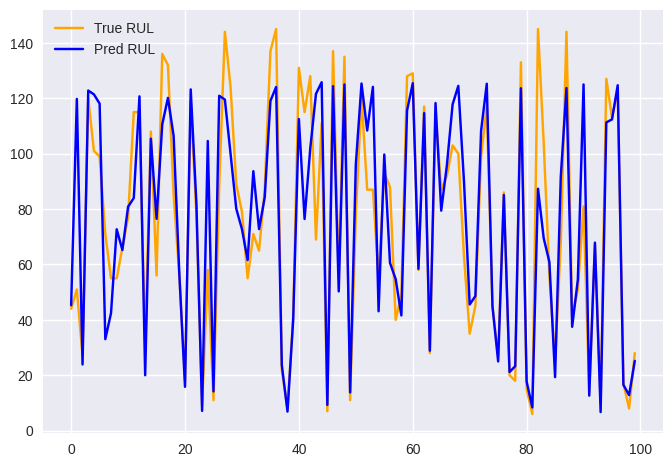

In [ ]:
plt.plot(true_rul, label = "True RUL", color = "orange")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()